In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

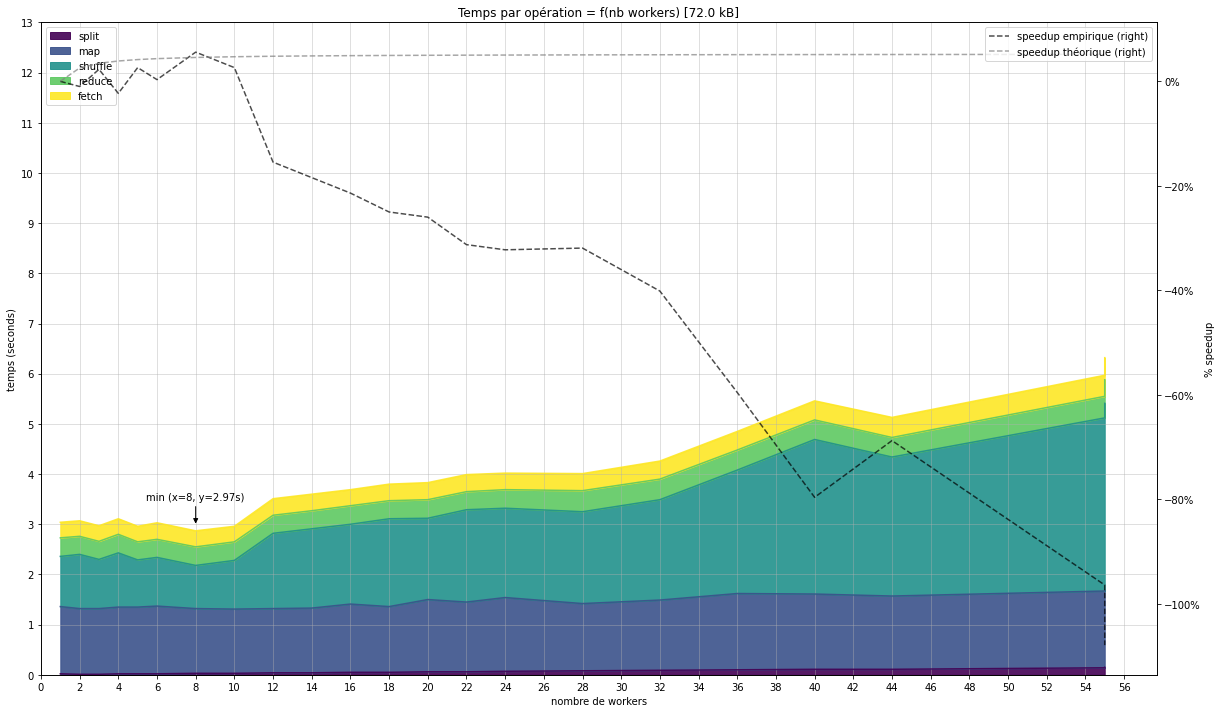

In [106]:
graph_xs = pd.read_csv("exec_times_xsmall.csv", index_col="workers")
columns = graph_xs.columns
graph_xs = graph_xs.iloc[:-5,:]

graph_xs["speedup empirique"] =  (graph_xs[columns].sum(axis=1).iloc[0] - graph_xs[columns].sum(axis=1)) / graph_xs[columns].sum(axis=1).iloc[0]
graph_xs["speedup theorique"] = 1/((1-0.05)+(0.05/graph_xs.index))-1
graph_xs[["speedup empirique","speedup theorique"]]

xmin = graph_xs.sum(axis=1).idxmin()
ymin = graph_xs.loc[xmin,:].sum()

fig = plt.figure(figsize=(20, 12));
ax = fig.add_subplot(1, 1, 1)

graph_xs[columns].plot.area(colormap='viridis', alpha=0.9, ax=ax);

ax.annotate('min (x={}, y={:.2f}s)'.format(xmin, ymin), 
xy=(xmin, ymin), xytext=(xmin, ymin+0.5), ha='center',
arrowprops={'arrowstyle':'-|>','facecolor':'black'})

axr = graph_xs["speedup empirique"].plot(alpha=0.7, color='black', linestyle='dashed', label='speedup empirique', secondary_y=True, ax=ax);
graph_xs["speedup theorique"].plot(alpha=0.7, color='grey', linestyle='dashed', label='speedup théorique', secondary_y=True, ax=axr);

axr.set_ylabel('% speedup', );
axr.yaxis.set_major_formatter(mtick.PercentFormatter(1));
axr.legend(loc='upper right')
ax.set_xlabel('nombre de workers');
ax.set_xticks(np.arange(0, 57, 2));
ax.set_xlim(xmin=0)
ax.set_ylabel('temps (seconds)');
ax.set_yticks(np.arange(0, 14, 1));
ax.set_ylim(ymin=0)
ax.set_title('Temps par opération = f(nb workers) [72.0 kB]');
ax.legend(loc='upper left');

ax.grid(visible=True, alpha=0.5, which='major');

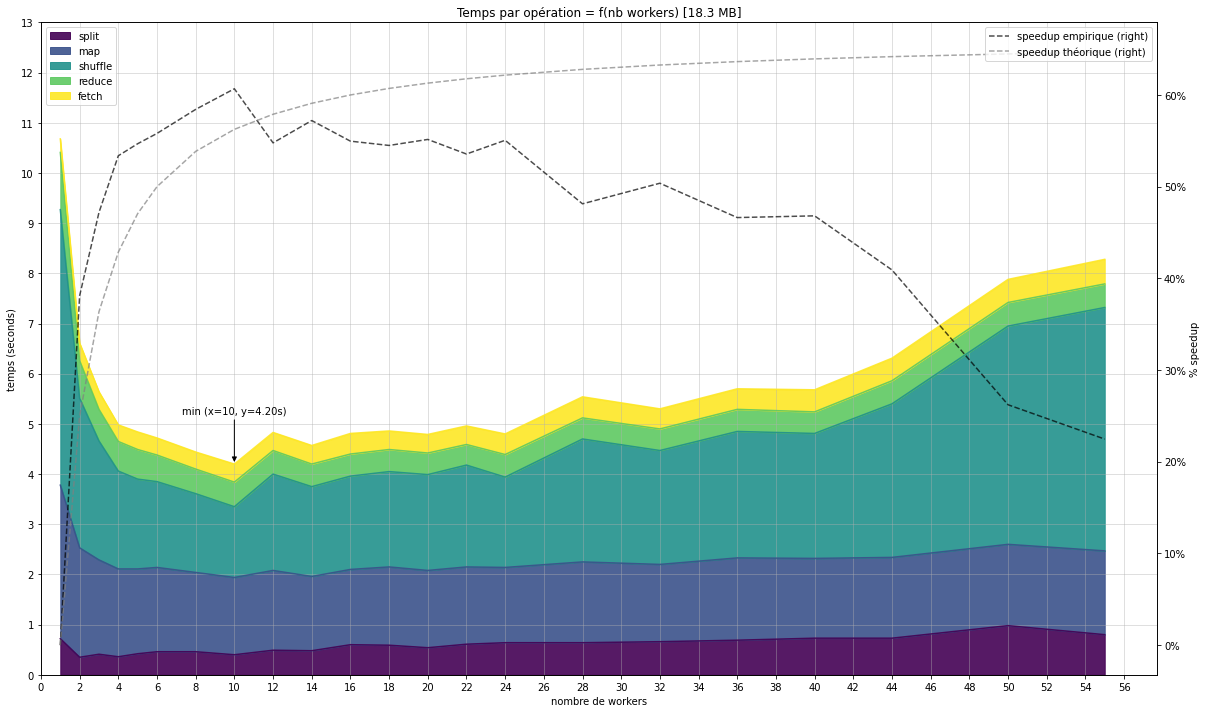

In [128]:
graph_s = pd.read_csv("exec_times_small.csv", index_col="workers")
graph_s = graph_s.iloc[:-5,:]
graph_s["speedup empirique"] =  (graph_s[columns].sum(axis=1).iloc[0] - graph_s[columns].sum(axis=1)) / graph_s[columns].sum(axis=1).iloc[0]
graph_s["speedup theorique"] = 1/((1-0.4)+(0.4/graph_s.index))-1

xmin = graph_s[columns].sum(axis=1).idxmin()
ymin = graph_s[columns].loc[xmin,:].sum()

fig = plt.figure(figsize=(20, 12));
ax = fig.add_subplot(1, 1, 1)
#ax2 = ax.twinx()

graph_s[columns].plot.area(colormap='viridis', alpha=0.9, ax=ax);

ax.annotate('min (x={}, y={:.2f}s)'.format(xmin, ymin), 
xy=(xmin, ymin), xytext=(xmin, ymin+1), ha='center',
arrowprops={'arrowstyle':'-|>','facecolor':'black'})

axr = graph_s["speedup empirique"].plot(alpha=0.7, color='black', linestyle='dashed', label='speedup empirique', secondary_y=True, ax=ax);
graph_s["speedup theorique"].plot(alpha=0.7, color='grey', linestyle='dashed', label='speedup théorique', secondary_y=True, ax=axr);

axr.set_ylabel('% speedup', );
axr.yaxis.set_major_formatter(mtick.PercentFormatter(1));
axr.legend(loc='upper right')
ax.set_xlabel('nombre de workers');
ax.set_xticks(np.arange(0, 57, 2))
ax.set_xlim(xmin=0)
ax.set_ylabel('temps (seconds)');
ax.set_yticks(np.arange(0, 14, 1));
ax.set_ylim(ymin=0)
ax.set_title('Temps par opération = f(nb workers) [18.3 MB]');
ax.legend(loc='upper left');

ax.grid(visible=True, alpha=0.5, which='major');

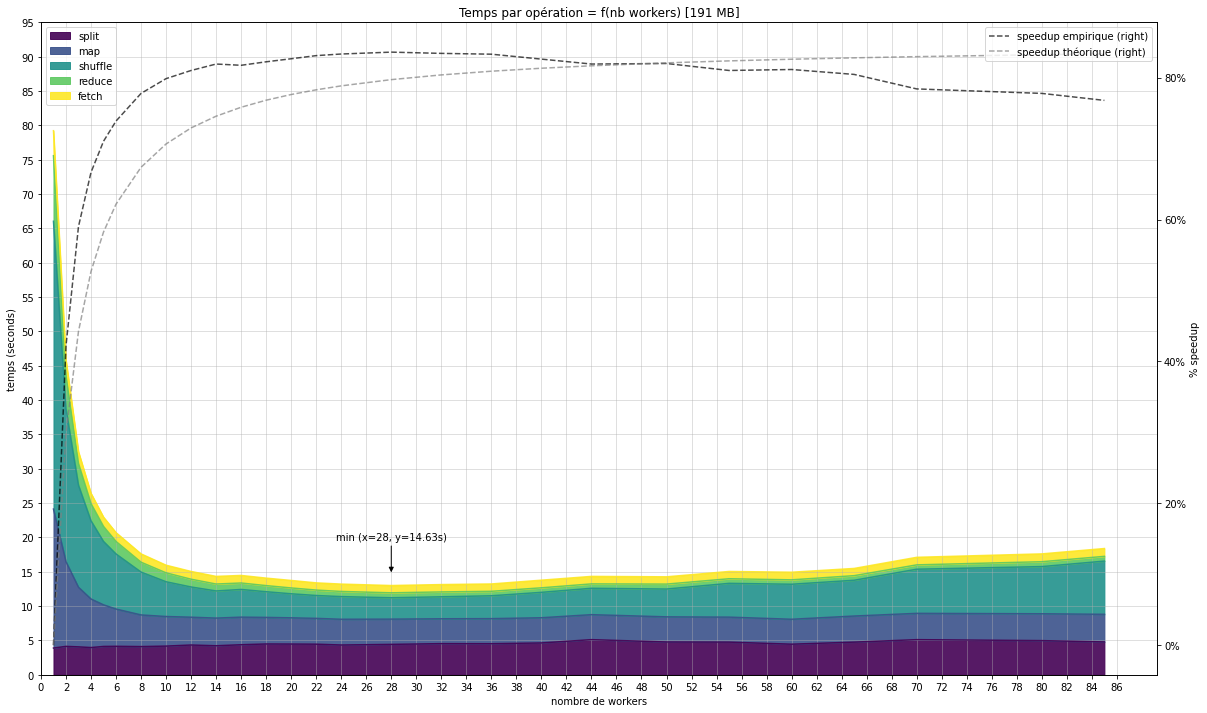

In [126]:
graph_m = pd.read_csv("exec_times_medium.csv", index_col="workers")

graph_m["speedup empirique"] =  (graph_m[columns].sum(axis=1).iloc[0] - graph_m[columns].sum(axis=1)) / graph_m[columns].sum(axis=1).iloc[0]
graph_m["speedup theorique"] = 1/((1-0.46)+(0.46/graph_m.index))-1
graph_m[["speedup empirique","speedup theorique"]]

xmin = graph_m.sum(axis=1).idxmin()
ymin = graph_m.loc[xmin,:].sum()

fig = plt.figure(figsize=(20, 12));
ax = fig.add_subplot(1, 1, 1)

graph_m[columns].plot.area(colormap='viridis', alpha=0.9, ax=ax);

ax.annotate('min (x={}, y={:.2f}s)'.format(xmin, ymin), 
xy=(xmin, ymin), xytext=(xmin, ymin+5), ha='center',
arrowprops={'arrowstyle':'-|>','facecolor':'black'})

axr = graph_m["speedup empirique"].plot(alpha=0.7, color='black', linestyle='dashed', label='speedup empirique', secondary_y=True, ax=ax);
graph_m["speedup theorique"].plot(alpha=0.7, color='grey', linestyle='dashed', label='speedup théorique', secondary_y=True, ax=axr);

axr.set_ylabel('% speedup', );
axr.yaxis.set_major_formatter(mtick.PercentFormatter(1));
axr.legend(loc='upper right')
ax.set_xlabel('nombre de workers');
ax.set_xticks(np.arange(0, 88, 2));
ax.set_xlim(xmin=0)
ax.set_ylabel('temps (seconds)');
ax.set_yticks(np.arange(0, 100, 5));
ax.set_ylim(ymin=0)
ax.set_title('Temps par opération = f(nb workers) [191 MB]');
ax.legend(loc='upper left');

ax.grid(visible=True, alpha=0.5, which='major');

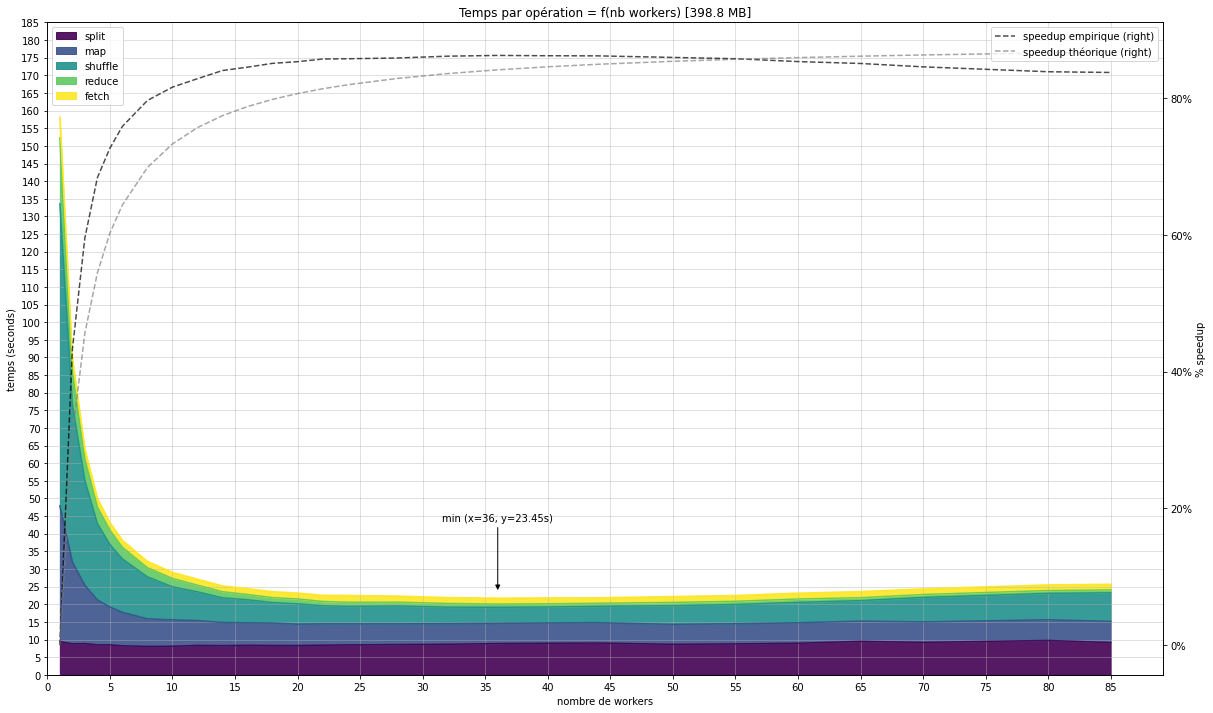

In [110]:
graph_l = pd.read_csv("exec_times_large.csv", index_col="workers")

graph_l["speedup empirique"] =  (graph_l[columns].sum(axis=1).iloc[0] - graph_l[columns].sum(axis=1)) / graph_l[columns].sum(axis=1).iloc[0]
graph_l["speedup theorique"] = 1/((1-0.47)+(0.47/graph_l.index))-1
graph_l[["speedup empirique","speedup theorique"]]

xmin = graph_l.sum(axis=1).idxmin()
ymin = graph_l.loc[xmin,:].sum()

fig = plt.figure(figsize=(20, 12));
ax = fig.add_subplot(1, 1, 1)

graph_l[columns].plot.area(colormap='viridis', alpha=0.9, ax=ax);

ax.annotate('min (x={}, y={:.2f}s)'.format(xmin, ymin), 
xy=(xmin, ymin), xytext=(xmin, ymin+20), ha='center',
arrowprops={'arrowstyle':'-|>','facecolor':'black'})

axr = graph_l["speedup empirique"].plot(alpha=0.7, color='black', linestyle='dashed', label='speedup empirique', secondary_y=True, ax=ax);
graph_l["speedup theorique"].plot(alpha=0.7, color='grey', linestyle='dashed', label='speedup théorique', secondary_y=True, ax=axr);

axr.set_ylabel('% speedup', );
axr.yaxis.set_major_formatter(mtick.PercentFormatter(1));
axr.legend(loc='upper right')
ax.set_xlabel('nombre de workers');
ax.set_xticks(np.arange(0, 86, 5));
ax.set_xlim(xmin=0)
ax.set_ylabel('temps (seconds)');
ax.set_yticks(np.arange(0, 190, 5));
ax.set_ylim(ymin=0)
ax.set_title('Temps par opération = f(nb workers) [398.8 MB]');
ax.legend(loc='upper left');

ax.grid(visible=True, alpha=0.5, which='major');

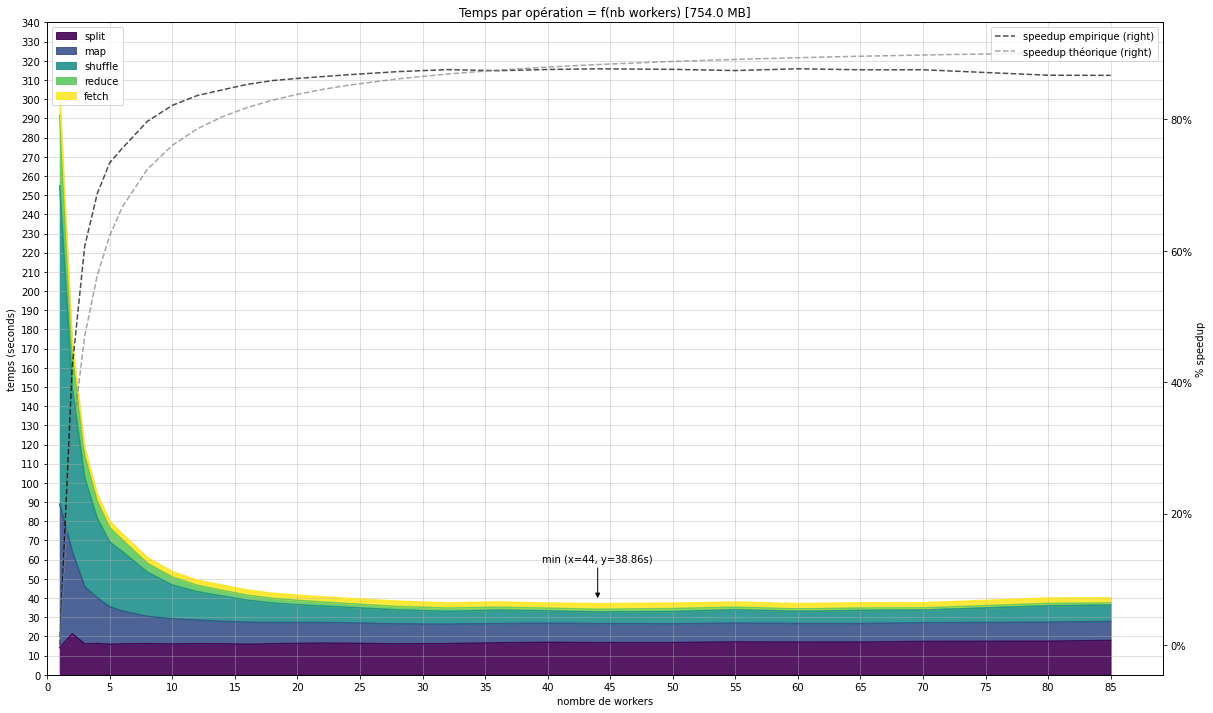

In [111]:
graph_xl = pd.read_csv("exec_times_xlarge.csv", index_col="workers")

graph_xl["speedup empirique"] =  (graph_xl[columns].sum(axis=1).iloc[0] - graph_xl[columns].sum(axis=1)) / graph_xl[columns].sum(axis=1).iloc[0]
graph_xl["speedup theorique"] = 1/((1-0.48)+(0.48/graph_xl.index))-1
graph_xl[["speedup empirique","speedup theorique"]]

xmin = graph_xl.sum(axis=1).idxmin()
ymin = graph_xl.loc[xmin,:].sum()

fig = plt.figure(figsize=(20, 12));
ax = fig.add_subplot(1, 1, 1)

graph_xl[columns].plot.area(colormap='viridis', alpha=0.9, ax=ax);

ax.annotate('min (x={}, y={:.2f}s)'.format(xmin, ymin), 
xy=(xmin, ymin), xytext=(xmin, ymin+20), ha='center',
arrowprops={'arrowstyle':'-|>','facecolor':'black'})

axr = graph_xl["speedup empirique"].plot(alpha=0.7, color='black', linestyle='dashed', label='speedup empirique', secondary_y=True, ax=ax);
graph_xl["speedup theorique"].plot(alpha=0.7, color='grey', linestyle='dashed', label='speedup théorique', secondary_y=True, ax=axr);

axr.set_ylabel('% speedup', );
axr.yaxis.set_major_formatter(mtick.PercentFormatter(1));
axr.legend(loc='upper right')
ax.set_xlabel('nombre de workers');
ax.set_xticks(np.arange(0, 86, 5));
ax.set_xlim(xmin=0)
ax.set_ylabel('temps (seconds)');
ax.set_yticks(np.arange(0, 350, 10));
ax.set_ylim(ymin=0)
ax.set_title('Temps par opération = f(nb workers) [754.0 MB]');
ax.legend(loc='upper left');

ax.grid(visible=True, alpha=0.5, which='major');

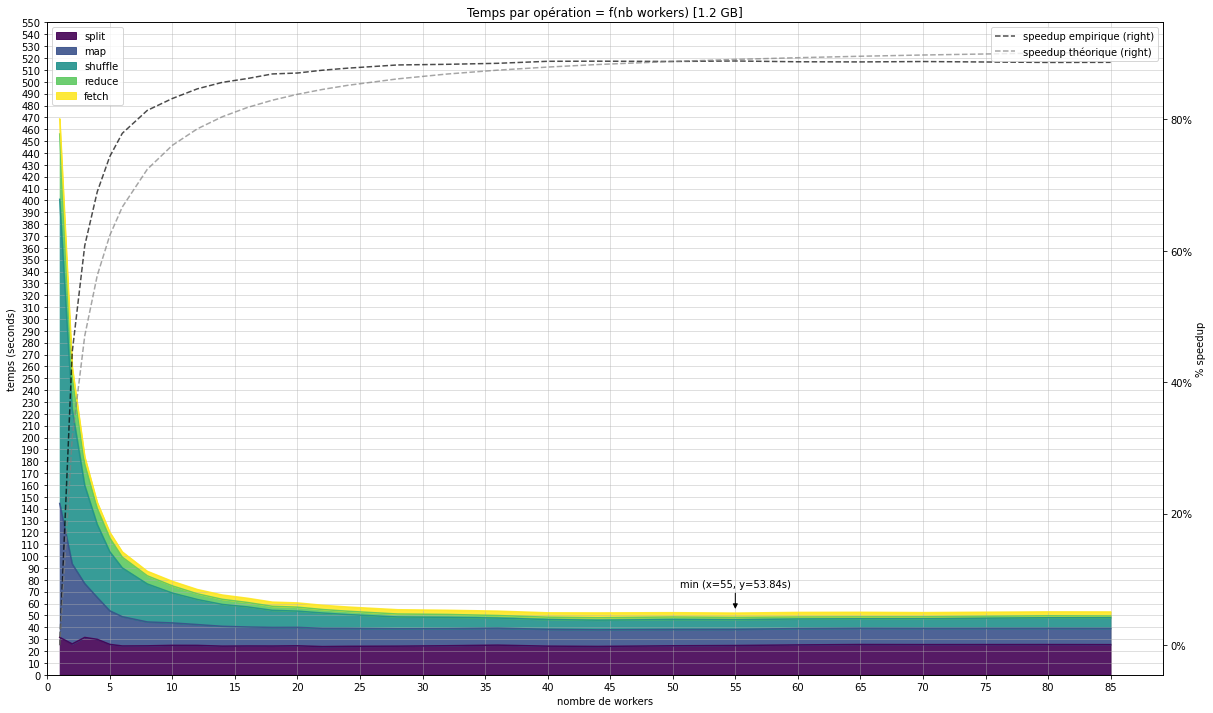

In [112]:
graph_xxl = pd.read_csv("exec_times_xxlarge.csv", index_col="workers")

graph_xxl["speedup empirique"] =  (graph_xxl[columns].sum(axis=1).iloc[0] - graph_xxl[columns].sum(axis=1)) / graph_xxl[columns].sum(axis=1).iloc[0]
graph_xxl["speedup theorique"] = 1/((1-0.48)+(0.48/graph_xxl.index))-1
graph_xxl[["speedup empirique","speedup theorique"]]

xmin = graph_xxl.sum(axis=1).idxmin()
ymin = graph_xxl.loc[xmin,:].sum()

fig = plt.figure(figsize=(20, 12));
ax = fig.add_subplot(1, 1, 1)

graph_xxl[columns].plot.area(colormap='viridis', alpha=0.9, ax=ax);

ax.annotate('min (x={}, y={:.2f}s)'.format(xmin, ymin), 
xy=(xmin, ymin), xytext=(xmin, ymin+20), ha='center',
arrowprops={'arrowstyle':'-|>','facecolor':'black'})

axr = graph_xxl["speedup empirique"].plot(alpha=0.7, color='black', linestyle='dashed', label='speedup empirique', secondary_y=True, ax=ax);
graph_xxl["speedup theorique"].plot(alpha=0.7, color='grey', linestyle='dashed', label='speedup théorique', secondary_y=True, ax=axr);

axr.set_ylabel('% speedup', );
axr.yaxis.set_major_formatter(mtick.PercentFormatter(1));
axr.legend(loc='upper right')
ax.set_xlabel('nombre de workers');
ax.set_xticks(np.arange(0, 86, 5));
ax.set_xlim(xmin=0)
ax.set_ylabel('temps (seconds)');
ax.set_yticks(np.arange(0, 560, 10));
ax.set_ylim(ymin=0)
ax.set_title('Temps par opération = f(nb workers) [1.2 GB]');
ax.legend(loc='upper left');

ax.grid(visible=True, alpha=0.5, which='major');

In [113]:
graph_xs['size'] = 0.072
graph_s['size'] = 18.3
graph_m['size'] = 191.0
graph_l['size'] = 398.8
graph_xl['size'] = 754.0
graph_xxl['size'] = 1179.5

#graph_all = graph_xs.append(graph_s).append(graph_m).append(graph_l).append(graph_xl).append(graph_xxl)
graph_all = graph_s.append(graph_m).append(graph_l).append(graph_xl).append(graph_xxl)
graph_all['total'] = graph_all['split'] + graph_all['map'] + graph_all['shuffle'] + graph_all['reduce'] + graph_all['fetch']
graph_all = graph_all.reset_index()
graph_all

,workers,split,map,shuffle,reduce,fetch,speedup empirique,speedup theorique,size,total
0,1,0.72,3.06,5.49,1.14,0.27,0.000000,0.000000,18.3,10.68
1,2,0.35,2.18,2.98,0.75,0.35,0.381086,0.250000,18.3,6.61
2,3,0.41,1.88,2.37,0.63,0.35,0.471910,0.363636,18.3,5.64
3,4,0.36,1.75,1.95,0.59,0.33,0.533708,0.428571,18.3,4.98
4,5,0.42,1.69,1.79,0.59,0.35,0.546816,0.470588,18.3,4.84
...,...,...,...,...,...,...,...,...,...,...
125,60,25.20,13.79,8.07,1.67,3.88,0.887751,0.893939,1179.5,52.61
126,65,25.54,13.72,8.00,1.58,3.87,0.887538,0.896149,1179.5,52.71
127,70,25.46,13.71,8.21,1.52,3.55,0.888092,0.898048,1179.5,52.45
128,80,25.50,13.70,8.91,1.62,3.36,0.886727,0.901141,1179.5,53.09


<ipython-input-118-d551859fc5de>:52: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(x_grid, y_grid, surface_reg, alpha = 0.3, color='lightseagreen', label='surface d\'interpolation')
<ipython-input-118-d551859fc5de>:52: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(x_grid, y_grid, surface_reg, alpha = 0.3, color='lightseagreen', label='surface d\'interpolation')
<ipython-input-118-d551859fc5de>:52: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(x_grid, y_grid, surface_reg, alpha = 0.3, color='lightseagreen', label='surface d\'interpolation')
<ipython-input-118-d551859fc5de>:52: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(x_grid, y_grid, surface_reg, alpha = 0.3, color='lightseagreen', label='surface d\'interpolation')


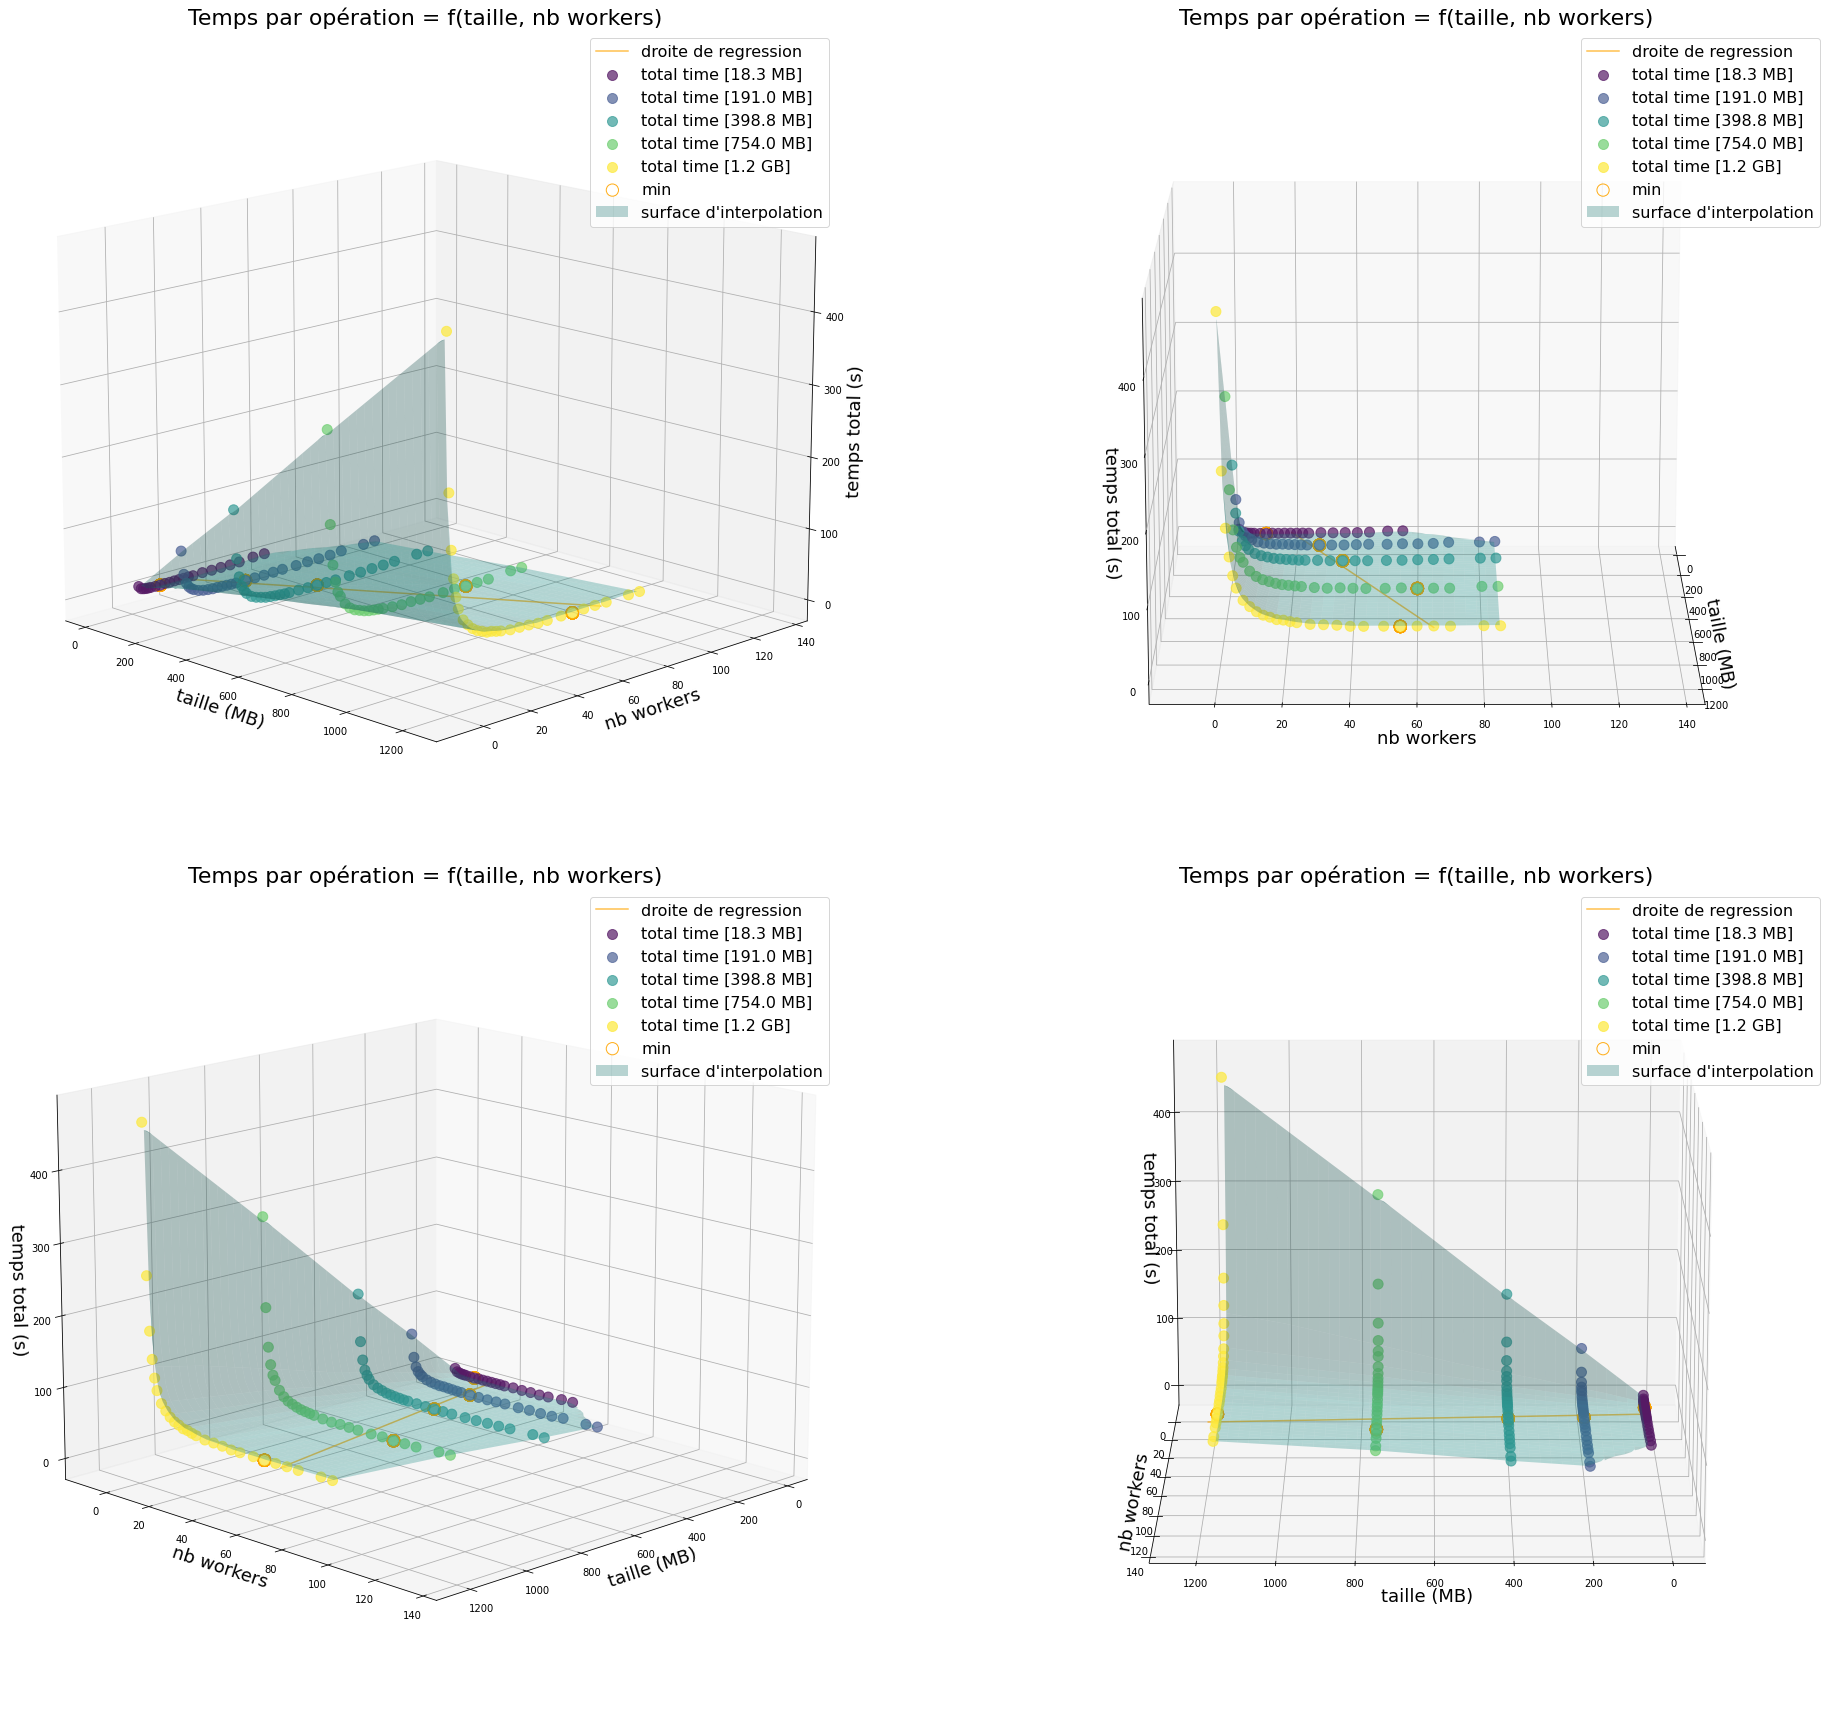

In [118]:
from mpl_toolkits import mplot3d
from scipy.interpolate import LinearNDInterpolator
from sklearn.linear_model import LinearRegression

# creation de la surface d'interpolation
linspace_interval = lambda x_data: np.linspace(x_data.min()-10, x_data.max()+50, len(x_data))
x_grid, y_grid = np.meshgrid(linspace_interval(graph_all['size']), linspace_interval(graph_all['workers']))

interp = LinearNDInterpolator(graph_all[['size', 'workers']].values, graph_all['total'].values)
surface_reg = interp(x_grid, y_grid)

# initialisation de la zone de dessin
fig = plt.figure(figsize=(30, 24));

# creation de la droite de regression
data = graph_all.iloc[graph_all.groupby('size')['total'].idxmin()][[ 'size', 'workers', 'total']]
X, y = data.iloc[:,0].values, data.iloc[:,1:].values

reg = LinearRegression()
reg.fit(X.reshape(-1, 1), y)
X_reg = np.array([15, 200, 400, 800, 1200]).reshape((-1, 1))
y_reg = reg.predict(X_reg)

# tracé des points de données
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    size = 18.3
    ax.scatter3D(graph_all[graph_all['size'] == size]['size'], graph_all[graph_all['size'] == size]['workers'], graph_all[graph_all['size'] == size]['total'], color='#561A65', s=100, alpha=0.7, label='total time [18.3 MB]');
    idxmin = graph_all[graph_all['size'] == size]['total'].idxmin()
    ax.scatter3D(graph_all[graph_all['size'] == size]['size'], graph_all.iloc[idxmin]['workers'], graph_all.iloc[idxmin]['total'], edgecolors='orange', s=150, marker='o', facecolors='none', alpha=0.9);

    size = 191.0
    ax.scatter3D(graph_all[graph_all['size'] == size]['size'], graph_all[graph_all['size'] == size]['workers'], graph_all[graph_all['size'] == size]['total'], color='#4E6396', s=100, alpha=0.7, label='total time [191.0 MB]');
    idxmin = graph_all[graph_all['size'] == size]['total'].idxmin()
    ax.scatter3D(graph_all[graph_all['size'] == size]['size'], graph_all.iloc[idxmin]['workers'], graph_all.iloc[idxmin]['total'], edgecolors='orange', s=150, marker='o', facecolors='none', alpha=0.9);

    size = 398.8
    ax.scatter3D(graph_all[graph_all['size'] == size]['size'], graph_all[graph_all['size'] == size]['workers'], graph_all[graph_all['size'] == size]['total'], color='#379C97', s=100, alpha=0.7, label='total time [398.8 MB]');
    idxmin = graph_all[graph_all['size'] == size]['total'].idxmin()
    ax.scatter3D(graph_all[graph_all['size'] == size]['size'], graph_all.iloc[idxmin]['workers'], graph_all.iloc[idxmin]['total'], edgecolors='orange', s=150, marker='o', facecolors='none', alpha=0.9);

    size = 754.0
    ax.scatter3D(graph_all[graph_all['size'] == size]['size'], graph_all[graph_all['size'] == size]['workers'], graph_all[graph_all['size'] == size]['total'], color='#6ECE71', s=100, alpha=0.7, label='total time [754.0 MB]');
    idxmin = graph_all[graph_all['size'] == size]['total'].idxmin()
    ax.scatter3D(graph_all[graph_all['size'] == size]['size'], graph_all.iloc[idxmin]['workers'], graph_all.iloc[idxmin]['total'], edgecolors='orange', s=150, marker='o', facecolors='none', alpha=0.9);

    size = 1179.5
    ax.scatter3D(graph_all[graph_all['size'] == size]['size'], graph_all[graph_all['size'] == size]['workers'], graph_all[graph_all['size'] == size]['total'], color='#FDE93B', s=100, alpha=0.7, label='total time [1.2 GB]');
    idxmin = graph_all[graph_all['size'] == size]['total'].idxmin()
    ax.scatter3D(graph_all[graph_all['size'] == size]['size'], graph_all.iloc[idxmin]['workers'], graph_all.iloc[idxmin]['total'], edgecolors='orange', s=150, marker='o', facecolors='none', alpha=0.9, label='min');

    surf = ax.plot_surface(x_grid, y_grid, surface_reg, alpha = 0.3, color='lightseagreen', label='surface d\'interpolation')
    ax.view_init(15, (i-1)*45);

    ax.plot3D(X_reg.ravel(), y_reg[:,0], y_reg[:,1], alpha = 0.7, color='orange', label='droite de regression');

    # nécessaire pour afficher les légendes
    # commenter les 4 lignes suivantes si cela pose problème ou s'il y a un warning
    surf._facecolors2d = surf._facecolor3d
    surf._edgecolors2d = surf._edgecolor3d
    ax.legend(fontsize=16);

    ax.set_xlabel('taille (MB)', fontsize=18);
    ax.set_ylabel('nb workers', fontsize=18);
    ax.set_zlabel('temps total (s)', fontsize=18);
    ax.set_title('Temps par opération = f(taille, nb workers)', fontsize=22);
    
# on utilise la néthode tight_layout() pour avoir un rendu plus compact
fig.tight_layout()